In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

sns.set_theme(style="white")


In [32]:
SET50 = pd.read_csv("assets/set50data.csv")
SET50["Date"] = pd.to_datetime(SET50["Date"], format="%m/%d/%Y")
SET50["Date"] = SET50["Date"].dt.strftime("%Y-%m-%d")
SET50["Open"] = SET50["Open"].str.replace(",", "").astype(float)


In [33]:
SET50.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1019,2020-01-08,"1,057.19",1063.94,"1,066.77","1,054.24",1.97B,-1.66%
1020,2020-01-07,"1,075.07",1071.20,"1,075.20","1,062.78",1.58B,1.06%
1021,2020-01-06,"1,063.83",1072.49,"1,074.50","1,061.17",2.03B,-1.45%
1022,2020-01-03,"1,079.50",1081.12,"1,086.71","1,077.32",1.48B,-0.14%
1023,2020-01-02,"1,081.00",1072.36,"1,083.41","1,071.16",1.75B,1.17%


In [34]:
SP500_TICKER = yf.Ticker("^GSPC")
SP500 = SP500_TICKER.history(period="3Y")
SP500.reset_index(inplace=True)
SP500["Date"] = SP500["Date"].dt.strftime("%Y-%m-%d")

In [35]:
SP500.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-22,3916.479980,3955.310059,3914.159912,3940.590088,4316260000,0.0,0.0
1,2021-03-23,3937.600098,3949.129883,3901.570068,3910.520020,4669010000,0.0,0.0
2,2021-03-24,3919.929932,3942.080078,3889.070068,3889.139893,4783020000,0.0,0.0
3,2021-03-25,3879.340088,3919.540039,3853.500000,3909.520020,4948340000,0.0,0.0
4,2021-03-26,3917.120117,3978.189941,3917.120117,3974.540039,5483160000,0.0,0.0


In [36]:
SET_TICKER = yf.Ticker("^SET.BK")
SET = SET_TICKER.history(period="3Y")
SET.reset_index(inplace=True)
SET["Date"] = SET["Date"].dt.strftime("%Y-%m-%d")

In [37]:
SET.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-22,1563.560059,1571.739990,1555.380005,1566.359985,9179700,0.0,0.0
1,2021-03-23,1572.699951,1574.140015,1562.030029,1564.250000,11706200,0.0,0.0
2,2021-03-24,1557.500000,1570.839966,1555.719971,1570.829956,12329000,0.0,0.0
3,2021-03-25,1576.270020,1580.170044,1571.040039,1571.040039,12229700,0.0,0.0
4,2021-03-26,1577.469971,1580.739990,1566.890015,1574.859985,11133500,0.0,0.0


In [38]:
NI225_TICKER = yf.Ticker("^N225")
NI225 = NI225_TICKER.history(period="3Y")
NI225.reset_index(inplace=True)
NI225["Date"] = NI225["Date"].dt.strftime("%Y-%m-%d")

In [39]:
NI225.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-19,29904.570312,30049.769531,29621.220703,29792.050781,128500000,0.0,0.0
1,2021-03-22,29444.099609,29472.980469,29107.630859,29174.150391,78800000,0.0,0.0
2,2021-03-23,29381.490234,29496.830078,28995.919922,28995.919922,79200000,0.0,0.0
3,2021-03-24,28765.550781,28867.669922,28379.060547,28405.519531,96000000,0.0,0.0
4,2021-03-25,28457.330078,28821.830078,28414.919922,28729.880859,72800000,0.0,0.0


In [40]:
CSI300_TICKER = yf.Ticker("000300.SS")
CSI300 = CSI300_TICKER.history(period="3Y")
CSI300.reset_index(inplace=True)
CSI300["Date"] = CSI300["Date"].dt.strftime("%Y-%m-%d")

In [41]:
CSI300.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-22,5008.399902,5071.339844,4996.540039,5057.149902,167400,0.0,0.0
1,2021-03-23,5057.060059,5064.020020,4966.529785,5009.250000,158000,0.0,0.0
2,2021-03-24,4985.399902,5024.330078,4919.890137,4928.689941,159400,0.0,0.0
3,2021-03-25,4904.069824,4950.759766,4883.660156,4926.350098,132900,0.0,0.0
4,2021-03-26,4953.950195,5050.830078,4953.950195,5037.990234,145900,0.0,0.0


<Axes: >

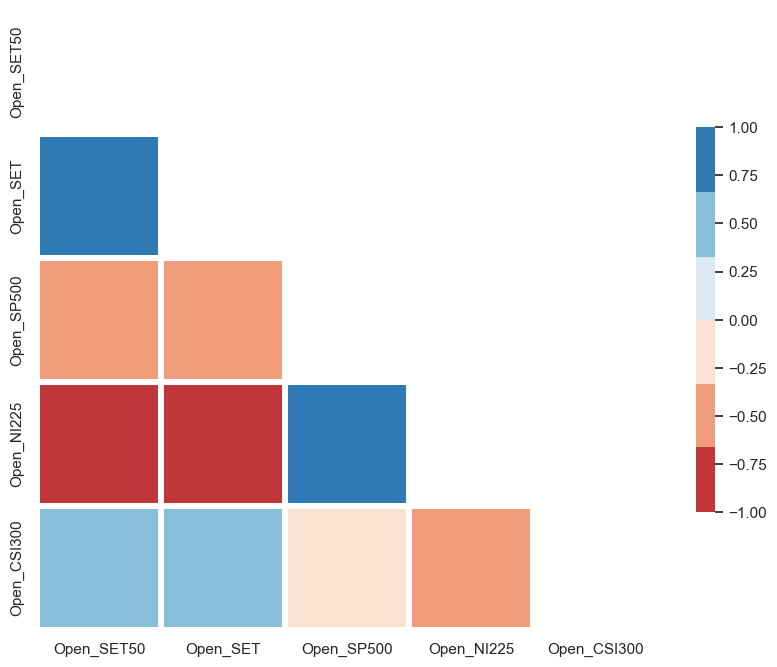

In [42]:
df = pd.merge(SET50, SET, on="Date", suffixes=("_SET50", "_SET"))
df = df.merge(SP500.add_suffix("_SP500"), left_on="Date", right_on="Date_SP500")
df = df.merge(NI225.add_suffix("_NI225"), left_on="Date", right_on="Date_NI225")
df = df.merge(CSI300.add_suffix("_CSI300"), left_on="Date", right_on="Date_CSI300")

corr = df[["Open_SET50", "Open_SET", "Open_SP500", "Open_NI225", "Open_CSI300"]].corr()
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("RdBu")

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidths=3,
            cbar_kws={"shrink": .5}
            )